In [1]:
import os
import pandas as pd

data_path = os.path.join('..', 'Datasets', 'clean_dataset.csv')

# Check if the file exists
if os.path.isfile(data_path):
    df = pd.read_csv(data_path)
else:
    print(f"File does not exist at the path: {data_path}")


In [2]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [4]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and their count
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_summary


Series([], dtype: int64)

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows found
duplicate_rows


0

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns for one-hot encoding
categorical_columns = ['Industry', 'Ethnicity', 'Citizen']

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Creating a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns and 'ZipCode' from the dataset
df_reduced = df.drop(categorical_columns + ['ZipCode'], axis=1)

# Concatenating the encoded features with the rest of the dataset
df_encoded = pd.concat([df_reduced, encoded_df], axis=1)

# Showing the new dataset structure
df_encoded.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = df_encoded.drop('Approved', axis=1)
y = df_encoded['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
6,PriorDefault,0.272721
8,CreditScore,0.094100
5,YearsEmployed,0.093720
10,Income,0.091312
2,Debt,0.090295
1,Age,0.077554
7,Employed,0.063219
26,Ethnicity_Black,0.017263
9,DriversLicense,0.015718
4,BankCustomer,0.013520


In [ ]:
# Refining the dataset to include only the selected top features and the target variable
selected_features = ['PriorDefault', 'CreditScore', 'YearsEmployed', 'Income', 'Approved']
df_refined = df_encoded[selected_features]

df_refined.head()

,PriorDefault,CreditScore,YearsEmployed,Income,Approved
0,1,1,1.25,0,1
1,1,6,3.04,560,1
2,1,0,1.50,824,1
3,1,5,3.75,3,1
4,1,0,1.71,0,1


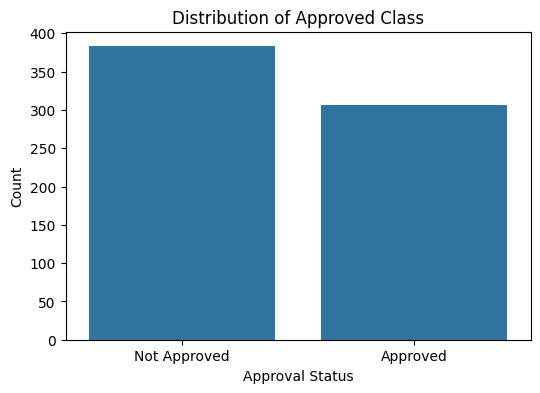

Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target class 'Approved'
plt.figure(figsize=(6, 4))
sns.countplot(x='Approved', data=df_refined)
plt.title('Distribution of Approved Class')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

# Calculating the distribution of the target class
class_distribution = df_refined['Approved'].value_counts(normalize=True)
class_distribution

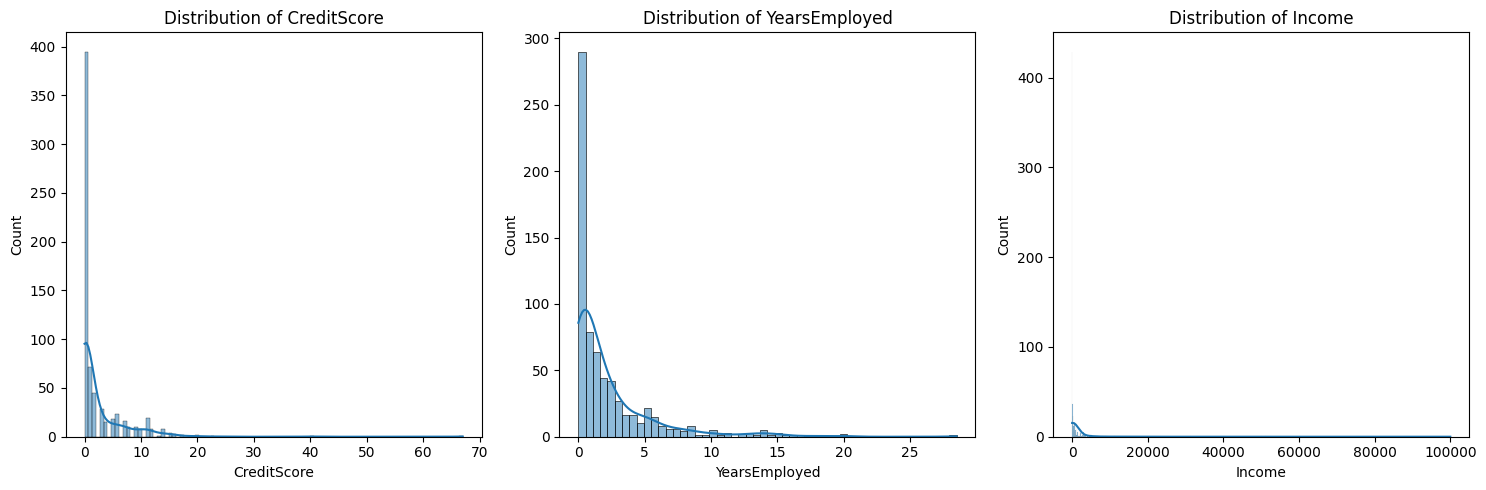

CreditScore       5.152520
YearsEmployed     2.891330
Income           13.140655
dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assessing skewness in the numerical features
numerical_features = ['CreditScore', 'YearsEmployed', 'Income']

# Plotting distributions for each numerical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_refined[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating skewness values
skewness_values = df_refined[numerical_features].skew()
skewness_values


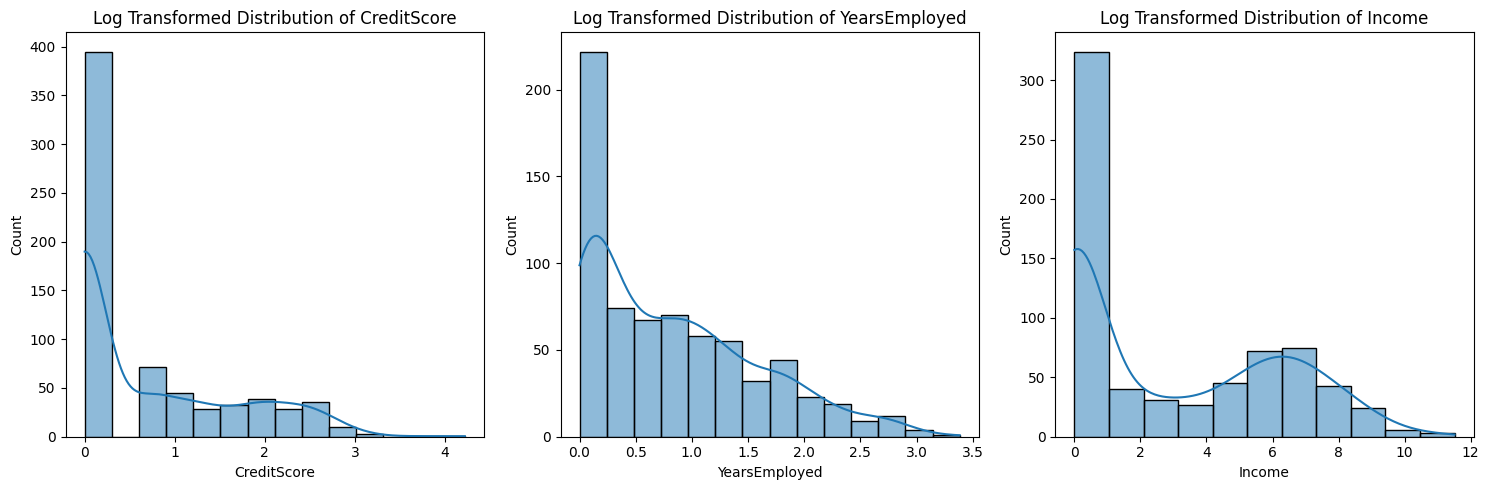

CreditScore      1.050913
YearsEmployed    0.819682
Income           0.510398
dtype: float64

In [ ]:
import numpy as np

# Applying log transformation with a small constant to handle zero values
df_transformed = df_refined.copy()
df_transformed['CreditScore'] = np.log(df_transformed['CreditScore'] + 1)
df_transformed['YearsEmployed'] = np.log(df_transformed['YearsEmployed'] + 1)
df_transformed['Income'] = np.log(df_transformed['Income'] + 1)

# Plotting distributions after log transformation
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_transformed[feature], kde=True)
    plt.title(f'Log Transformed Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating new skewness values
new_skewness_values = df_transformed[numerical_features].skew()
new_skewness_values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Selecting the numerical features for scaling
features_to_scale = ['CreditScore', 'YearsEmployed', 'Income']

# Applying Min-Max scaling
df_transformed[features_to_scale] = scaler.fit_transform(df_transformed[features_to_scale])

# Showing the scaled features
df_transformed.head()


,PriorDefault,CreditScore,YearsEmployed,Income,Approved
0,1,0.164272,0.239609,0.000000,1
1,1,0.461170,0.412554,0.549792,1
2,1,0.000000,0.270740,0.583290,1
3,1,0.424637,0.460392,0.120412,1
4,1,0.000000,0.294573,0.000000,1


In [ ]:
# Splitting the dataset into training and testing sets with stratification
X = df_transformed.drop('Approved', axis=1)
y = df_transformed['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming the split
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((552, 4), (138, 4)), ((552,), (138,)))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM model with default parameters
svm_baseline = SVC(random_state=42)

# Performing 5-fold cross-validation to evaluate the baseline model
cv_scores = cross_val_score(svm_baseline, X_train, y_train, cv=5)

# Calculating the mean cross-validation score
mean_cv_score = cv_scores.mean()

mean_cv_score

0.8423423423423424

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Initialize Grid Search with the SVM model and the defined parameter grid
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fitting Grid Search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score


({'C': 100, 'gamma': 1, 'kernel': 'rbf'}, 0.8477477477477479)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initializing the PolynomialFeatures generator with degree 2
poly = PolynomialFeatures(degree=2)

# Applying polynomial feature transformation to the training and testing sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Re-training the SVM model with the optimal parameters found and polynomial features
svm_optimized = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
svm_optimized.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred = svm_optimized.predict(X_test_poly)

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc

(0.8188405797101449,
 0.9090909090909091,
 0.6557377049180327,
 0.761904761904762,
 0.8018948264849903)